In [1]:
# import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

# filter warnings that can be ignored
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read dataset using read_csv() 
census_csv = pd.read_csv('census_data.csv')

#Building a Random Forest Model

In [3]:
#use LabelEncoderer to transform non-numerical labels into numerical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
census_le = census_csv.apply(le.fit_transform)

#split data 
X = census_le.loc[:,'hours_per_week_bin':'age_bin'] #features/col 
y = census_le.loc[:,'y']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, 
                                                 test_size=0.30,
                                                 random_state=42)
    #choose the general 30/70 splitting
    #I use 42 here since I want reproducible results

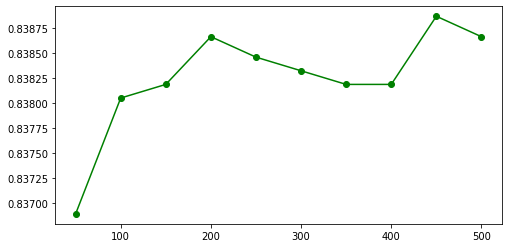

In [4]:
#import random forest package 
from sklearn.ensemble import RandomForestClassifier

results = []
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_options:
    model = RandomForestClassifier(n_estimators=trees) 
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_options).plot(color='green',marker = 'o')

#Building AdaBoost, Gradient Boost (classifier) and XGB Model


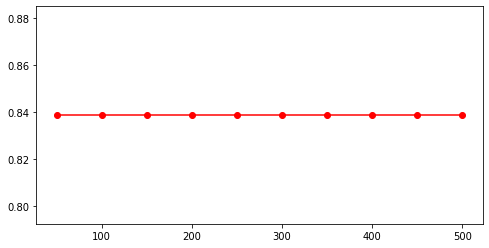

In [5]:
#import packages 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

#building adaboost model
results_ada = []
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_options:
    model_ada = AdaBoostClassifier(n_estimators=trees)
    model_ada.fit(X_train,y_train)
    y_pred_ada = model.predict(X_test)
    accuracy_ada = np.mean(y_test==y_pred_ada)
    results_ada.append(accuracy_ada)

plt.figure(figsize=(8,4))
pd.Series(results_ada, n_estimator_options).plot(color='red',marker = 'o')

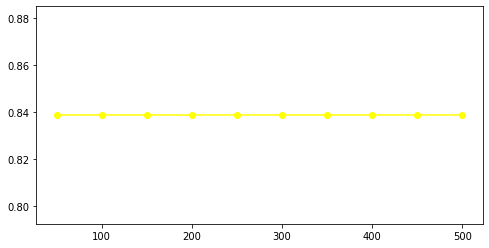

In [6]:
#building gradient boost model
results_gra = []
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_options:
    model_gra = GradientBoostingClassifier(n_estimators=trees)
    model_gra.fit(X_train,y_train)
    y_pred_gra = model.predict(X_test)
    accuracy_gra = np.mean(y_test==y_pred_gra)
    results_gra.append(accuracy_gra)

plt.figure(figsize=(8,4))
pd.Series(results_gra, n_estimator_options).plot(color='yellow',marker = 'o')

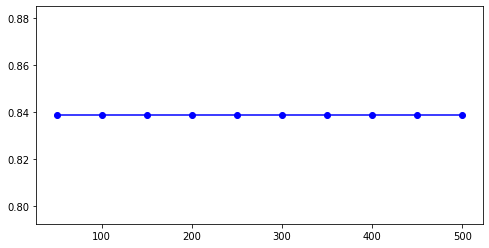

In [7]:
#import package
from xgboost import XGBClassifier

#build XGB model
results_xgb = []
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_options:
    model_xgb = XGBClassifier(n_estimators=trees,random_state=101)
    model_xgb.fit(X_train,y_train)
    y_pred_xgb = model.predict(X_test)
    accuracy_xgb = np.mean(y_test==y_pred_xgb)
    results_xgb.append(accuracy_xgb)

plt.figure(figsize=(8,4))
pd.Series(results_xgb, n_estimator_options).plot(color='blue',marker = 'o')

#Compare Performance

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

#run random forest model again 
model_rf = RandomForestClassifier(n_estimators=500)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
print('accuracy: ', accuracy_score(y_test,y_pred))
print('AUC: ', roc_auc_score(y_test,y_pred))


accuracy:  0.8394185491025729
AUC:  0.7460433495343799


In [9]:
#run adaboost model again 
model_ada = AdaBoostClassifier(n_estimators=500)
model_ada.fit(X_train, y_train)
y_pred = model_ada.predict(X_test)
print('accuracy: ', accuracy_score(y_test,y_pred))
print('AUC: ', roc_auc_score(y_test,y_pred))

accuracy:  0.8444687094792875
AUC:  0.7437055591352425


In [10]:
#run gradient boost model again 
model_gra = GradientBoostingClassifier(n_estimators=500)
model_gra.fit(X_train, y_train)
y_pred = model_gra.predict(X_test)
print('accuracy: ', accuracy_score(y_test,y_pred))
print('AUC: ', roc_auc_score(y_test,y_pred))

accuracy:  0.8473350167201256
AUC:  0.7577013645007902


In [11]:
#run XGB model again 
model_xgb = XGBClassifier(n_estimators=500)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
print('accuracy: ', accuracy_score(y_test,y_pred))
print('AUC: ', roc_auc_score(y_test,y_pred))

accuracy:  0.8474032621306217
AUC:  0.7573620731731354


In [12]:
#create performance comparison table 
#plt.figure(figsize=12,8)
#plot_decision_regions(model,legend=0) -- not appliable 

In [13]:
print('n_estimators = 500')

print('random_state = 42')


n_estimators = 500
random_state = 42
